## Time Series Exercises Using Datetime Library

In [64]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [65]:
# bring in the dataframe
df = data.sf_temps()

In [66]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [67]:
df.shape

(8759, 2)

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [68]:
# first things first, set date as index so we can be sure the data is in order
df = df.set_index('date').sort_index()

In [69]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [70]:
# resample by day and get mean average
df.resample('D').mean().head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


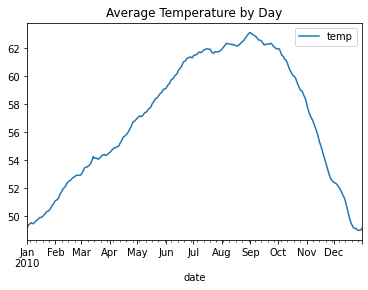

In [71]:
# now plot
# plt.figure(figsize=(16,9))
df.resample('D').mean().plot()
plt.title('Average Temperature by Day');

### 2. Write the code necessary to visualize the minimum temperature over time.

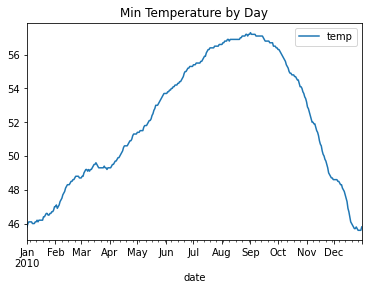

In [72]:
# resampling by day and using minimum temp of the day
df.resample('D').min().plot()
plt.title('Min Temperature by Day');

### 3. Write the code necessary to visualize the maximum temperature over time.

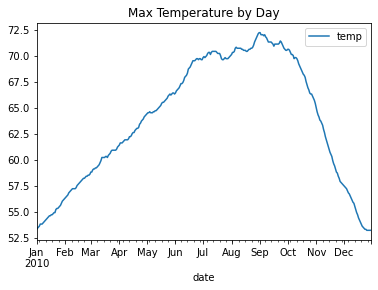

In [73]:
# resampling by day and using maximum temp of the day
df.resample('D').max().plot()
plt.title('Max Temperature by Day');

### 4. Which month is the coldest, on average?

In [74]:
# January is the coldest on average
df.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


### 5. Which month has the highest average temperature?

In [75]:
df.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [76]:
daily_min = df.resample('D').min()
daily_max = df.resample('D').max()

df['daily_temp_change'] = daily_max - daily_min
df.head()

,temp,daily_temp_change
date,,
2010-01-01 00:00:00,47.8,7.5
2010-01-01 01:00:00,47.4,NaN
2010-01-01 02:00:00,46.9,NaN
2010-01-01 03:00:00,46.5,NaN
2010-01-01 04:00:00,46.0,NaN


In [77]:
df.resample('M').daily_temp_change.mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: daily_temp_change, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [79]:
# df.resample('D').min().Close.plot(label='Daily Min')
# df.resample('D').mean().Close.plot(label='Daily Avg')
# df.resample('D').max().Close.plot(label='Daily Max')